# **COGS 108 - Final Project**

# **Overview**

 In this project, we figured out the relationship between the school vaccination rate and the educational resources in each state. We tried to prove whether states with better educational resources will have higher vaccination rate. In order to achieve this goal, we calcualted the average vaccination rate in each state and performed t-test between the average vaccination rate and the selected variables, including school types, the number of schools, and students enrolled. We found out that the number of schools and students enrolled are the two variables that have effects on the vaccination rate; however, the school type(public or private) do not have any affect. Furthermore, we built linear models using different combinations of the selected variables to predict the vaccination rate; however, the result proved that we are unable to find an appropriate model to do so, which is the major limitation of our work.

# **Names**


- Yao Tong
- Jingying Xie
- Yaocong Hu
- Noel Garcia

# **Research Question**

Do states with better educational resources tend to have higher school vaccination rate? To define educational resources, we want to analyze the amount of schools in that state, the number of students enrolled, and the type of the schools, whether it's private or public.


# **Background and Prior Work**

__Question of interest__

We chose to investigate the relationship between educational resources and school vaccination rate because we did not know if there is a statistically significant relationship between those two. There are two outcomes of people being sufficiently educated about vaccination: supporting vaccination as people realize the benefits vaccines can bring, or oppose vaccination as people also get more knowledge about the side effects and vaccine-related accidents. Besides, based on the resources that we found, this question also has social and political implications and is related to large amounts of social activities and relative policies. Thus, we believed it will be very interesting to search the social and political impacts behind the result. We hoped to develop a deeper understanding towards the education system.

__Background information and previous work__

With background information available, we observed some states that have better educational resources, including California and Washington, also have high rates of vaccination exemption. For example, the reported vaccine exemption for enrolled students in California is 0.6% of its student population, and is 0.8% in Washington. Surprisingly, states that were considered to have less educational resources tend to have lower vaccine exemption percentages. For example, this number becomes 0.1% in Mississippi and 0% in Arkansas  (reference 1). 

Based on the data we found in our first reference, we started to analyze the reasons behind those states with better educational resources but lower vaccination rates. The most common reason is active anti-vaccine movements within those states. For example, there are plenty of anti-vaccine movements in California each year. Popular reason for anti-vaccine is personal belief exemptions, which includes ideas such as vaccines will lead to diseases or side effects. People might be afraid that something like the Cutter incident can happen again (reference 5). 

At the same time, we also found news about protestors linking this movement to the Civil Rights Movement by singing the gospel song “We Shall Overcome” in the California State Capitol. Such events triggered our interests as we realized that school vaccination rates might not only represent the amount of students who are vaccinated, but there might also have a strong social and political implication behind those numbers (reference 2).

When we tried to find previous works that have been done in similar topics, we also found one study that analyzed the relationship between parental education and the access to childhood immunization in Spain. Differ from the last reference, this work demonstrated a positive relation between education and vaccination rate. Although this work studied parents’ education level and was not exactly the same as our topic, we thought parental education could also be a large part of education. In this paper, it stated that the higher the mothers’ educational attainment level, the higher the probability of children to be vaccinated. Thus, if we assume that parents are all educated and will stay in their hometown, we can briefly conclude that in places with better educational resources, students are more likely to be vaccinated (reference 3). 

Obviously, reference 2 and reference 3 somehow contradict one another under certain conditions. This contradiction brought up our interest. Thus, we wanted to study about the relation between education and vaccination. Our assumption was the effect of education overrules the amount of anti-vaccine movement in most cases, and education resources amount was positively related to student vaccination rate.

Besides two references showing different points of view, we also found a dataset that might help with our study. This dataset contains variables such as the amount of schools, the amount of enrolled students and the vaccination rate. We used this dataset as our major dataset (reference 4).

__Importance of understanding the relationship between education and vaccination__

Education affects thinking power and vaccination intends to exempt people from diseases. As demonstrated previously, vaccination rate could be an indicator of social and political ideology. Studying the relation between factors affecting mentality and health can give us a hint about if people tend to value more about ideology and let go of health as they are more educated. After understanding the relationship between education and social health, further study about how to promote both factors can be carried out. 

__References (include links)__
- 1) The amount of enrolled students who are exempt from one or more vaccines in each state: 
https://www.cdc.gov/vaccines/imz-managers/coverage/schoolvaxview/data-reports/exemptions-trend/index.html
- 2) Anti-vaccine protests likening themselves to civil rights activists: https://www.politico.com/story/2019/09/18/california-anti-vaccine-civil-rights-1500976
- 3) Paper that discusses the relationship between parental education and childhood immunization in Spain:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6052631/
- 4) Major dataset:
https://github.com/WSJ/measles-data
- 5) The Cutter Incident
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1383764/


# **Hypothesis**


We assumed that states with better educational resources would have a higher school vaccination rate. With better educational resources, which we defined as having more schools, more students enrolled and more private schools in this case, states should contain a larger amount of educated population who support vaccination. However, we also expected some outliers such as California and Washington to have lower school vaccination rates because of the anti-vaccine movements within the states. Combining resources we have found, as well as our common sense/life experience, we believed that assuming states with better educational resources to have higher school vaccination rate is reasonable.

# **Datasets**

In order to evaluate which states have better educational resources, we needed data that includes the amount of schools, the number of students enrolled, and the type of the schools, whether it's private or public. Thus, we needed to clean the original dataset to make it contains only the variables we needed. All of the data was uploaded as a csv format so it was easy to import and wrangle. 



In [0]:
#setting 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [65]:
#import dataset
from google.colab import drive 
drive.mount('/content/drive')

path_schools = '/content/drive/My Drive/Colab Notebooks/data/all-measles-rates.csv'
df_schools = pd.read_csv(path_schools) #Data for each individual school

path_states = '/content/drive/My Drive/Colab Notebooks/data/state-overviews.csv'
df_states = pd.read_csv(path_states) #More generalized data by state counties or state school districts

df_schools

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NaN,51.0,100.0,-1.0,NaN,NaN,NaN
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NaN,22.0,100.0,-1.0,NaN,NaN,NaN
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NaN,85.0,100.0,-1.0,NaN,NaN,NaN
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NaN,60.0,100.0,-1.0,NaN,NaN,NaN
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NaN,43.0,100.0,-1.0,NaN,2.33,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN


In [0]:
#concat two dataframes and store them as df_schools
df_schools = pd.concat([df_states, df_schools], ignore_index=True)

# **Data Cleaning**

In [0]:
#standardize the year column
def standardize_year(string):
    string = str(string)
    if '2017-18' in string:
        output = '2017'
    elif '2018-19' in string:
        output = '2018'
    elif '2015' in string or '2017' in string or '2018' in string:
        output = string
    else:
        output = np.nan
    return output


In [68]:
#apply the function and check the result
df_schools['year'] = df_schools['year'].apply(standardize_year)
df_schools = df_schools.dropna(subset=['year'])
df_schools['year'].unique()

array(['2017', '2018', '2015'], dtype=object)

In [0]:
#drop the overall == -1 rows
def standardize_overall(string):
    string = str(string)
    if string == '-1.0' or string == '0' or string == 'no' or string == 'nan' or string == '.':
        output = np.nan
    else:
        output = float(string)
    return output

In [0]:
#apply the function 
df_schools['overall'] = df_schools['overall'].apply(standardize_overall)


In [0]:
#drop the enroll == 0 rows
def standardize_enroll(num):
    num = str(num)
    num = num.replace(",", "")
    if num == '0' or num == 'nan':
        output = np.nan
    else:
        output = float(num)
    return output

In [72]:
#apply the function and check the result
df_schools['enroll'] = df_schools['enroll'].apply(standardize_enroll)
df_schools['enroll'].unique()

array([ 199.,  195.,  212., ..., 1202.,  933.,  789.])

In [0]:
# drop rows having no vaccination rate or enrollment data
df_schools = df_schools.dropna(subset=['overall'])
df_schools = df_schools.dropna(subset=['enroll'])

In [0]:
#calculate the number of student get vaccination at each school
def vaccination_percentage(overallRate, enrollment):
    overallRate = float(overallRate)
    vaccinated = overallRate * enrollment /100
    return vaccinated

In [0]:
#apply the function to a new column named vac_num
df_schools['vac_num'] = df_schools.apply(lambda x: vaccination_percentage(x['overall'], x['enroll']), axis=1)

In [0]:
#calculate vaccination rate of each state
temp = df_schools.groupby(['state']).sum()
rate = temp['vac_num']/temp['enroll']
df_state_vac = pd.DataFrame(data = rate)


In [0]:
#create a new datafram with only state name and vaccination rate
df_state_vac['enroll'] = temp['enroll'];
df_state_vac.reset_index(level=0, inplace=True)
df_state_vac.columns = ['state','vaccination_rate','enroll']


In [0]:
#find the number of school in each state and store the school count into the dataframe "df_state_vac"
df_num_school_each_state = pd.DataFrame(df_schools['state'].value_counts())
df_num_school_each_state.reset_index(level=0, inplace=True)
df_num_school_each_state = df_num_school_each_state.rename(columns={'state':'count','index': 'state'})
df_state_vac['school_count'] = df_num_school_each_state['count']

In [79]:
#display the dataframe
df_num_school_each_state

,state,count
0,California,6522
1,Florida,2303
2,Ohio,1986
3,Michigan,1899
4,North Carolina,1862
5,Colorado,1315
6,Virginia,1311
7,Tennessee,1099
8,Iowa,882
9,Oregon,723


In [80]:
#add two columns: vaccination_rate and enroll
df_state_vac.set_index('state')
df_state_vac

,state,vaccination_rate,enroll,school_count
0,Alabama,0.925208,137539.0,6522
1,California,0.944350,541908.0,2303
2,Colorado,0.888362,70154.0,1986
3,Florida,0.934401,425313.0,1899
4,Indiana,0.553604,93849.0,1862
5,Iowa,0.979704,786521.0,1315
6,Kentucky,0.948716,50301.0,1311
7,Michigan,0.929716,116922.0,1099
8,New Jersey,0.961229,107619.0,882
9,North Carolina,0.965922,226196.0,723


# **Data Visualization** 

The plot "Enrollment and Vaccination Rate" demonstrates the vaccination rate in each state and the number of enrolled student in each state.  The plot "School Number and Vaccination Rate" demonstrates the vaccination rate in each state and the number of school in each state. For better visualization, state names in the x-axis are replaced by indexes. 

(0.5, 1.2)

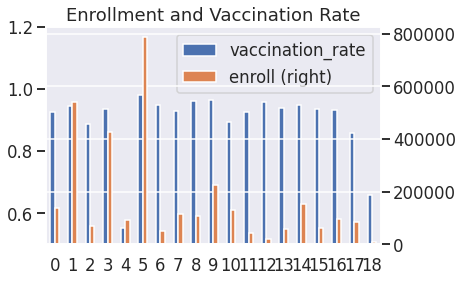

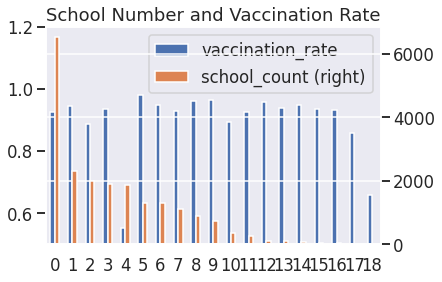

In [81]:
#plot bar plot
df_enroll = df_state_vac[['vaccination_rate','enroll']].copy()
df_school_count = df_state_vac[['vaccination_rate','school_count']].copy()
#df_vac_rate = df_state_vac[['vaccination_rate']]
bar_plt_enroll = df_enroll.plot( kind= 'bar', secondary_y= 'enroll', rot= 0, title = 'Enrollment and Vaccination Rate')
bar_plt_enroll.set_ylim(0.5,1.2)
bar_plt_school_count = df_school_count.plot( kind= 'bar', secondary_y= 'school_count',rot= 0,title = 'School Number and Vaccination Rate')
bar_plt_school_count.set_ylim(0.5,1.2)


# **Data Analysis & Results**

##School Counts

In [0]:
#drop null values on on the school type column
df_schools_type = df_schools.dropna(subset=['type'])

In [83]:
#diaplay the dataframe
df_schools_type

,index,state,year,county/district,enroll,mmr,overall,xmed,xper,xrel,name,type,city,county,district,vac_num
4476,1,California,2018,NaN,137.0,99.00,96.00,2,NaN,NaN,Abby Reinke Elementary,Public,Temecula,Riverside,NaN,131.5200
4477,2,California,2018,NaN,135.0,99.00,99.00,1,NaN,NaN,Abraham Lincoln Elementary,Public,Santa Ana,Orange,NaN,133.6500
4478,3,California,2018,NaN,116.0,99.00,99.00,1,NaN,NaN,Achieve Academy,Public,Oakland,Alameda,NaN,114.8400
4479,4,California,2018,NaN,100.0,99.00,97.00,NaN,NaN,NaN,Ada Clegg Elementary,Public,Huntington Beach,Orange,NaN,97.0000
4480,5,California,2018,NaN,121.0,99.00,99.00,1,NaN,NaN,Adam William Laird Elementary,Public,Santa Maria,Santa Barbara,NaN,119.7900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38648,1983,Ohio,2018,NaN,71.0,19.72,16.90,NaN,NaN,NaN,Roberts Academy: A Paideia Learning Community,Public,Cincinnati,Hamilton,NaN,11.9990
38649,1984,Ohio,2018,NaN,53.0,18.87,15.09,NaN,NaN,NaN,Silverton Paideia Elementary,Public,Cincinnati,Hamilton,NaN,7.9977
38650,1985,Ohio,2018,NaN,69.0,18.84,15.94,NaN,NaN,NaN,College Hill Fundamental Academy,Public,Cincinnati,Hamilton,NaN,10.9986
38651,1986,Ohio,2018,NaN,48.0,16.67,16.67,NaN,NaN,NaN,Riverside,Public,Cleveland,Cuyahoga,NaN,8.0016


In [0]:
#compare distributions: t-test
t_val = stats.ttest_ind(df_state_vac['vaccination_rate'], df_state_vac['school_count'])[0]
p_val = stats.ttest_ind(df_state_vac['vaccination_rate'], df_state_vac['school_count'])[1]

In [85]:
#check if statistical test passes significance, using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


In [0]:
#check confounding variable: private vs. public school, pull put data we will use
vac_public = df_schools_type['mmr'][df_schools_type['type'] == 'Public']
vac_private = df_schools_type['mmr'][df_schools_type['type'] == 'Private']

In [87]:
#find avg values and print the result
avg_vac_public = vac_public.mean()
avg_vac_private = vac_private.mean()
print('Average vaccination rate of public schools is \t {:2.2f} %'.format(avg_vac_public))
print('Average vaccination rate of private schools is \t {:2.2f} %'.format(avg_vac_private))

Average vaccination rate of public schools is 	 94.80 %
Average vaccination rate of private schools is 	 92.18 %


In [0]:
#check confounding variable
n_public = df_schools_type[df_schools_type['type'] == 'Public']['type'].value_counts()
n_private = df_schools_type[df_schools_type['type'] == 'Private']['type'].value_counts()

In [0]:
#ratio of public and private schools
r_public = n_public / (n_public + n_private)
r_public = 1 - r_public

In [90]:
#run a chi-squared test of the difference of ratios of categorical data between groups:
chisq, p_val_chi = stats.chisquare(np.array([n_public.values, n_private.values]), axis=None)
if p_val_chi < 0.01:
    print('There is a significant difference in ratios!')

There is a significant difference in ratios!


In [0]:
#create a pivot table 
pv = pd.pivot_table(df_schools_type, values='mmr', index=['state', 'type'])

In [92]:
#display the pivot table
pv

mmr
state      type                   
California Private       92.948335
           Public        96.013980
Colorado   Kindergarten  94.399969
           Private       95.384118
Ohio       Private       90.388490
           Public        90.457269

Our initial hypothesis suggested that there is a significant difference between the vaccination rate and the amount of shcools in different states. However, further analyses suggested that there may be a confounding variable, as there is also a significantly different school type balance among states.
Checking the average vaccination rate, per state, split up by school types, suggests there may not be a difference among states, other than what is explained by school types.

In [93]:
#1st order model: school_count
data = df_state_vac.values
X = df_state_vac['school_count']
Y = df_state_vac['vaccination_rate']
ones = np.ones(len(X))
A1 = np.vstack([ones, X]) 
A1 = A1.T
print(A1.shape)

#Solve for w, the weight vector
w1 = np.linalg.lstsq(A1, Y, rcond=None)[0]

print("Model M1:")
print("Vaccination rate = %f + %f * school count" % (w1[0],w1[1]))

(19, 2)
Model M1:
Vaccination rate = 0.898756 + 0.000000 * school count


In [94]:
#2nd order model: school_count
squares = np.square(X)
A2 = np.vstack([ones, X, squares]) 
A2 = A2.T
print(A2.shape)

#Solve for w, the weight vector
w2 = np.linalg.lstsq(A2, Y, rcond=None)[0]

print("Model M2:")
print("Vaccination rate = %f + %f * school count + %f * school count^2" % (w2[0],w2[1],w2[2]))


(19, 3)
Model M2:
Vaccination rate = 0.906581 + -0.000015 * school count + 0.000000 * school count^2


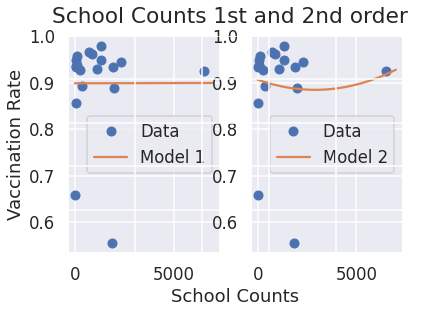

In [95]:
#Compare two models with plotting
#Create a smooth set of X values for plotting the model
lineinput = np.linspace(-10, 7000, 46)

#Send the X values for plotting through the linear model
ones = np.ones(len(lineinput))
squares = np.square(lineinput)
A_1 = np.vstack([ones, lineinput]) 
A_2 = np.vstack([ones, lineinput, squares]) 

yplot1 = np.matmul(A_1.T, w1)
yplot2 = np.matmul(A_2.T, w2)

#Plot the data along with the model
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(X, Y, 'o', label='Data')
ax[0].plot(lineinput, yplot1, label='Model 1')
ax[0].legend()

ax[1].plot(X, Y, 'o', label='Data')
ax[1].plot(lineinput, yplot2, label='Model 2')
ax[1].legend()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("School Counts")
plt.ylabel("Vaccination Rate")
fig.suptitle('School Counts 1st and 2nd order')

plt.show()

In [0]:
#OLS linear model
outcome_1 = patsy.dmatrices('vaccination_rate~school_count',df_state_vac)[0]
predictors_1 = patsy.dmatrices('vaccination_rate~school_count',df_state_vac)[1]
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [97]:
# Print out the summary results of the model fitting
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       vaccination_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                 3.855e-05
Date:                Tue, 09 Jun 2020   Prob (F-statistic):              0.995
Time:                        08:06:38   Log-Likelihood:                 15.717
No. Observations:                  19   AIC:                            -27.43
Df Residuals:                      17   BIC:                            -25.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8988      0.032     28.153   

We tried to use the 1st order and 2nd order linear models to predict the vaccination rate, however, it seems that both models are not ideal. Then, we tried to use another variable to find the approperiate model.

##Number of Students Enrolled

In [0]:
#compare distributions: t-test
t_val = stats.ttest_ind(df_state_vac['vaccination_rate'], df_state_vac['enroll'])[0]
p_val = stats.ttest_ind(df_state_vac['vaccination_rate'], df_state_vac['enroll'])[1]


In [99]:
#check if statistical test passes significance, using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


In [100]:
#1st order model: students enrolled
data = df_state_vac.values
X = df_state_vac['enroll']
Y = df_state_vac['vaccination_rate']
ones = np.ones(len(X))
A1 = np.vstack([ones, X]) 
A1 = A1.T
print(A1.shape)

## Solve for w, the weight vector
w1 = np.linalg.lstsq(A1, Y, rcond=None)[0]

print("Model M1:")
print("Vaccination rate = %f + %f * student enrolled" % (w1[0],w1[1]))


(19, 2)
Model M1:
Vaccination rate = 0.872597 + 0.000000 * student enrolled


In [101]:
#2nd order model: students enrolled
squares = np.square(X)
A2 = np.vstack([ones, X, squares]) 
A2 = A2.T
print(A2.shape)

## Solve for w, the weight vector
w2 = np.linalg.lstsq(A2, Y, rcond=None)[0]

print("Model M2:")
print("Vaccination rate = %f + %f * students enrolled + %f * students enrolled^2" % (w2[0],w2[1],w2[2]))


(19, 3)
Model M2:
Vaccination rate = 0.853629 + 0.000000 * students enrolled + -0.000000 * students enrolled^2


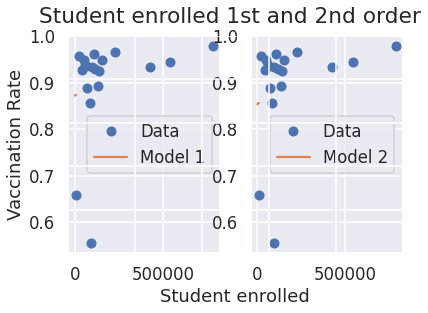

In [102]:
#Compare two models with plotting
#Create a smooth set of X values for plotting the model
lineinput = np.linspace(-10, 7000, 46)

#Send the X values for plotting through the linear model
ones = np.ones(len(lineinput))
squares = np.square(lineinput)
A_1 = np.vstack([ones, lineinput]) 
A_2 = np.vstack([ones, lineinput, squares]) 

yplot1 = np.matmul(A_1.T, w1)
yplot2 = np.matmul(A_2.T, w2)

#Plot the data along with the model
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(X, Y, 'o', label='Data')
ax[0].plot(lineinput, yplot1, label='Model 1')
ax[0].legend()

ax[1].plot(X, Y, 'o', label='Data')
ax[1].plot(lineinput, yplot2, label='Model 2')
ax[1].legend()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Student enrolled")
plt.ylabel("Vaccination Rate")
fig.suptitle('Student enrolled 1st and 2nd order')

plt.show()

In [0]:
#OLS linear model
outcome_1 = patsy.dmatrices('vaccination_rate~enroll',df_state_vac)[0]
predictors_1 = patsy.dmatrices('vaccination_rate~enroll',df_state_vac)[1]
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [104]:
# Print out the summary results of the model fitting
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       vaccination_rate   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.539
Date:                Tue, 09 Jun 2020   Prob (F-statistic):              0.232
Time:                        08:06:40   Log-Likelihood:                 16.540
No. Observations:                  19   AIC:                            -29.08
Df Residuals:                      17   BIC:                            -27.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8726      0.032     26.895      0.0

The 1st and 2nd order linear models were not the best models for both variables to predit the vaccination rate. Thus, we wanted to test the multivariate linear regression with cross validation to see if we can find a better model using both variables.

vaccination_rate = 0.868913 + -0.000004 * school_count + 0.000000 * enroll


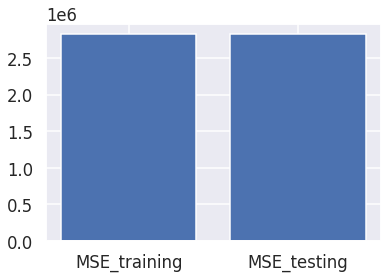

In [105]:
#multivariate linear regression with cross validation
#traning and testing data 80:20 split
msk = np.random.rand(len(df_state_vac)) < 0.8
train = df_state_vac[msk]
test = df_state_vac[~msk]

# Extract the variables
y = train['vaccination_rate'].values
x1 = train['school_count'].values
x2 = train['enroll'].values

# Find w
ones = np.ones(len(x1))
A = np.vstack([ones, x1, x2]) 
A = A.T
w = np.linalg.lstsq(A, y, rcond=None)[0]
print("vaccination_rate = %f + %f * school_count + %f * enroll" % (w[0],w[1],w[2]))

# Find MSEs and plot 
SSE = 0
ypred = w[0]+x1*w[0]+x2*w[2]
for i in ypred-y:
    SSE = SSE + i*i
MSE = SSE/len(y)
   
y_test = test['vaccination_rate'].values
x1_test = test['school_count'].values
x2_test = test['enroll'].values
SSE_test = 0
ypred_test = w[0]+x1_test*w[0]+x2_test*w[2] 
for j in ypred_test-y_test:
    SSE_test = SSE_test + j*j
MSE_test = SSE_test/len(y_test)

xx = np.arange(2)
SSE = [MSE, MSE_test]
plt.bar(xx, MSE)
plt.xticks(xx, ('MSE_training','MSE_testing'))
plt.show()


Large values of MSE for both the training and the testing data are shown, which means the multivariate linear model is not very approperiate to use.

In [0]:
#Multivariate regression
outcome_2 = patsy.dmatrices('vaccination_rate~enroll+school_count',df_state_vac)[0]
predictors_2 = patsy.dmatrices('vaccination_rate~enroll+school_count',df_state_vac)[1]
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()


In [107]:
# Print out the results 
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:       vaccination_rate   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.7689
Date:                Tue, 09 Jun 2020   Prob (F-statistic):              0.480
Time:                        08:06:40   Log-Likelihood:                 16.589
No. Observations:                  19   AIC:                            -27.18
Df Residuals:                      16   BIC:                            -24.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8766      0.036     24.245   

# **Ethics & Privacy**

Open source data with only school names and locations was used in the project, so we did not need to consider data privacy. However, we did realize that our finding could be involved in ethical situations. For example, we found out that the school type did not have any effect on the vaccination rate on each state. This contradicts with our initial thinking since there is always a perception that private schools, with higher accessibility towards vaccines and medical resources, will have higher vaccination rates than public schools. In reality, higher vaccination rate/accessibility towards medical resouces are often used by private schools as a slogan to attract or misguide students and parents. Thus, we did realize that part of our findings can be involved in ethical issues as we tend to reveal the truth behind the education system.

# **Conclusion & Discussion**

  **Conclusion:** We successfully predicted that the number of schools and the number of students enrolled have significant influenece on the vaccination rate on each state; however, we failed to predict that the school type does not have any significant influenece. Thus, we did not support our hypothesis completely since we predicted that all three factors will affect the vaccination rate of the state, and states with higher values of all three factors will have higher vaccination rate. Furthermore, we also found that based on our OLS analysis, it is unable to predict the vaccination rate based on the three factors or the any combinations of them.

  
 **Discussion:** When making some linear models using Ordinary Least Squares (OLS), we found that all of the factors, incuding the combinations of them, are not able to predict the vaccination rate since they all have p-values greater than 0.001. This is the major limitation of our project. However, we thought it is normal to obtain such result since the vaccination rate is hard to predict based on limited factors, and a linear model might not be the best one to use. At the same time, we also searched for other religious and political factors that we belived also have an impact on the vaccination rate. For example, states such as Wyoming and Indiana, which had the lowest vaccination rates, are also states that have larger religious population. 
 
One surprising finding is that the anti-vaccination movements do not have large impact on the vaccination rate of the state. For example, states such as California and Florida, which have large amount of anti-vaccination movements each year, have very high vaccination rates compared to states which have less active anti-vaccination movements.

As a result, although we did not find the approperiate model to predict the school vaccination rate, we did find out that factors such as the number of students enrolled and the number of schools in each state will affect the vaccination rate. The type of schools, however, will not affect the vaccination rate. Thus, the perception that private schools tend to have higher vaccination rate is more likely a misleading slogan that is used to benefit certain groups in the education system.



# **Team Contribution**


- Yao Tong: Overview, Research Question, Background & Prior Work, Hypothesis, Data Analysis & Results, Ethics & Privacy, Conclusion & Discussion
- Jingying Xie: Background & Prior Work, Hypothesis, Datasets, Data Cleaning, Data Visualization 
- Yaocong Hu
- Noel Garcia